<a href="https://colab.research.google.com/github/Pratt33/ML_Algorithms_From_Scratch/blob/main/Multiple_Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:
Build a Multiple Linear Regression model from scratch to predict diabetes progression based on various medical attributes.

#Objective:
1. Understand and implement linear regression using numpy.
2. Evaluate the model performance using metrics.
3. Visualize the results to assess predictions.

# Approach:
1. Implement a class-based model for Multiple Linear Regression.
2. Train the model on the given dataset using the Normal Equation.
3. Predict values for the test set and evaluate using the R2 score.
4. Plot the predicted vs. actual values for visual analysis.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
class Mymlr:
    def __init__(self):
        # Initialize coefficients and intercept
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        # Add a column of ones to X_train for the intercept term
        X_train = np.insert(X_train, 0, 1, axis=1)

        # Calculate the coefficients using the Normal Equation
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        # Set the intercept and coefficients
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):
        # Predict using the learned coefficients
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

In [3]:
# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
# Instantiate the custom linear regression model
lr = Mymlr()

# Train the model on the training set
lr.fit(X_train, y_train)

In [6]:
# Predict on the test set
y_pred = lr.predict(X_test)

In [7]:
# Evaluate the model using R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.43993386615689634


In [8]:
# Display the coefficients and intercept
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
Intercept: 151.88331005254165


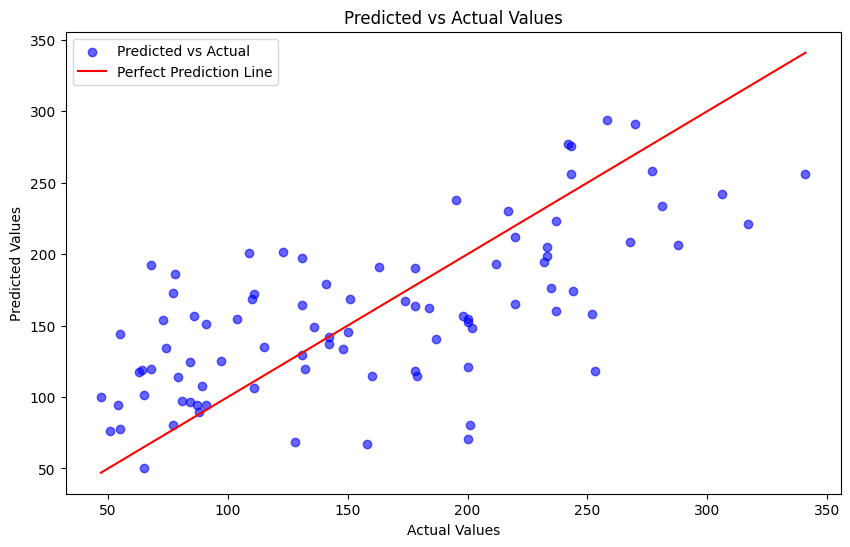

In [9]:
# Plotting Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()